<h1><center>PBH microlensing</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=18)

## 1) Density profile


The HSC survey made observations of the Andromeda Galaxy (M31) which is 770 kpc away from the Earth with a galactic coordinate $\{ l, b\} = \{121.2^{\circ}, -21.6^{\circ} \}$.

We need to model the density of both the Milky Way (MW) and M31. To do this we can use the NFW profile

\begin{equation}
    \rho_{\mathrm{NFW}}(r) =  \frac{\rho_0}{\frac{r}{r_s}\left(1 + \frac{r}{r_s}\right)^2}.
\end{equation}

where $\rho_0$ and $r_s$ are the scale density and radius respectively. These values for the MW and M31 are as follows:

|  |MW  | M31|
--- | --- | ---
|$\frac{\rho_0}{M_{\odot} \text{pc}^{-3}}$|4.88 x 10<sup>-3</sup>|4.96 x 10<sup>-3</sup>|
|$\frac{r_s}{\text{pc}}$ |21.5x 10<sup>3</sup>|25  x 10<sup>3</sup>|

Let $x D_s$ be the distance from the observer on Earth to some point along the path to M31 (at a distance of $D_s$ away) where $x \in \{0, 1\}$.

**1.1** Calculate the galactic radius at point $x$ along this path. (<i>Hint: The sun is $8.5\times10^3$ pc away from the center of the MW</i>).

**1.2** Write a function which takes $x$ as an argument and returns this distance

**1.3** Write functions which calculate the DM density due to the MW and M31 as a function of their radius $r$ (*Hint: this could be a single function if it took $\rho_0$ and $r_s$ as inputs*).

**1.4** Finally, use these to write a python function which takes $x$ as an input and returns the combined DM density from the MW and M31. Plot the result.

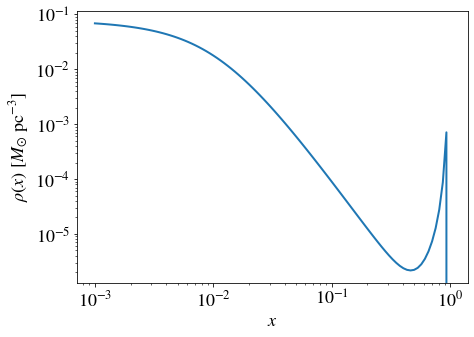

In [2]:
# M31 location
Ds = 770e3 # pc
long = 121.2 # deg
lat = -21.6 # deg

# Radius of suns orbit around MW
R_sol = 8.5e3 # pc

def galactic_radius(x):
    ''' Calculates distance from galactic center to point x in los 
    from Earth to M31 in pc'''
    object_distance = x*Ds  
    # convert to radians
    l = long/180*np.pi # rad
    b = lat/180*np.pi # rad
    
    A = object_distance**2
    B = R_sol**2
    C = - 2*R_sol*object_distance*np.cos(b)*np.cos(l)
    
    return (A + B + C)**(1/2)

def nfw_density(radius, rs, rho0):
    density = rho0/(radius/rs * (radius/rs)**2)
    return density

def los_density(x):
    '''Returns the density at point x along the light of sight to an object
    Ds pc away with longitude l and latitude b in Msol/pc^3.
    '''
    # calculate radius
    radius = galactic_radius(x)
    
    # MW contribution
    scale_radius_MW = 21.5e3 # pc
    scale_density_MW = 0.00488 # Msol/pc^3
    density_MW = nfw_density(radius, scale_radius_MW, scale_density_MW)

    # M31 contribution
    scale_radius_M31 = 25e3 # pc
    scale_density_M31 = 0.00496 # Msol/pc^3
    density_M31 = nfw_density(Ds - radius, scale_radius_M31, scale_density_M31)

    return density_MW + density_M31

plt.figure(figsize = (7, 5))
x = np.logspace(-3, 0, 100)
plt.loglog(x, los_density(x), lw=2)
plt.ylabel(r"$\rho(x)$ [$M_{\odot}$ pc$^{-3}$]");
plt.xlabel(r"$x$");

## 2) Differential detection rate

Microlensing events occur when an object passes through a microlensing "tube" of radius $u_{T}R_E(x)$ where $R_E$ is the Einstein radius given by

\begin{equation}
    R_E(x) = 2\left[\frac{GMx(1-x)D_S}{c^2}\right]^{1/2},
\end{equation}

where $x=D_L/D_S$ in which $D_L$ is the distance to the lends and $D_S$ is the distance to the source.

The differential detection rate for light produced by point sources and lensed by point masses $M$ is given by

\begin{equation}
    \frac{d\Gamma}{d\hat{t}} = \frac{32 D_s u_T^4}{\hat{t}^4 v_c^2}\frac{1}{M} \int^{u_T}_0\rho(x) R_E^4(x) e^{-Q(x)} \mathrm{d}x,
\end{equation}

where $\hat{t}$ is the time taken to cross the Einstein diameter, $L$ is the exposure, $v_c = 220$ km s$^{-1}$ is the local circular speed and 

\begin{equation}
    Q(x) = \frac{4 R_E^2(x)u_T^2}{\hat{t}^2v_c^2}.
\end{equation}

In the <i>geometical approximation</i> $u_T$ = 1.

**2.1** Write a function which takes the distance $x$ and lens mass $M_{\mathrm{pbh}}$ as an input and returns the Einstein radius $R_E$. <i> Hints: It might make the units a little easier if you use $G = 4.30\times 10^{-3}$ pc$M_{\odot}^{–1}$⋅(km/s)$^2$. $R_E$ should be at a maximum when $x = 0.5$.

**2.2** Write a function which takes $\hat{t}$ and $M_{\mathrm{pbh}}$ as inputs and returns the differential detection rate $d\Gamma / d\hat{t}$

**2.3** Plot $d\Gamma / d\hat{t}$ as a function of $\hat{t}$ in the range $\hat{t} \in \{1, 10^6\}$s for a few different PBH masses.

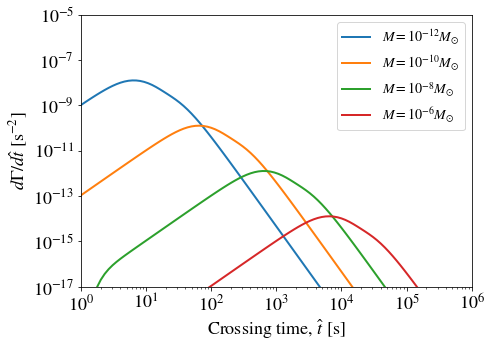

In [3]:
pc = 3.086e+16 # m
Msol = 2e30 # kg
G = 4.30e-3 # pc⋅Msol^(–1)⋅(km/s)^2
c = 299792 # km/s
v_circ = 220*1e3/pc # pc/s

def einstein_radius(M, x):
    '''Calculates Einstein radius in pc
    ''' 
    # Calculate Einstein radius
    R_E = 2*(G*M*x*(1-x)*Ds/c**2)**(1/2)
    
    return R_E

def Qfunc(x, M, t_hat):
    R_E = einstein_radius(M, x) # km
    return 4*R_E**2/(t_hat**2 * v_circ**2)

def calc_dGdt(M, t_hat, xvals = 100):
    A = 32*Ds/t_hat**4/v_circ**2/M
    
    x = np.logspace(-5 - np.log10(xvals), 0, xvals)
    rho = los_density(x) # Msol/pc^3
    R_E = einstein_radius(M, x) # pc
    
    integrand = rho*R_E**4*np.exp(-Qfunc(x, M, t_hat))
    
    integral = np.trapz(integrand, x)
    return A*integral

t_hats = np.logspace(0, 6, 100)

plt.figure(figsize = (7, 5))
for M in [1e-12, 1e-10, 1e-8, 1e-6]:
    dGdt = np.asarray([calc_dGdt(M, t_hat, xvals = 100) for t_hat in t_hats])
    label = "$M = 10^{" + "{}".format(int(np.log10(M))) + "} M_{\odot}$"
    plt.loglog(t_hats, dGdt, lw = 2, label = label)
    
plt.ylim(1e-17, 1e-5)
plt.xlim(1, 1e6)

plt.ylabel(r"$d\Gamma/d\hat{t}$ [s$^{-2}$]");
plt.xlabel("Crossing time, $\hat{t}$ [s]")
plt.legend(loc = 1, prop = {"size":14});

## 3) Number of expected events

The number of observed events expected is given by

\begin{equation}
    N_{\mathrm{exp}} = E f_{\mathrm{pbh}}\int ^{\infty}_0 \frac{\mathrm{d}\Gamma}{\mathrm{d}\hat{t}} \epsilon(\hat{t})\mathrm{d}\hat{t},
\end{equation}

where $E$ is the exposure, $f_{\mathrm{pbh}}$ is the fraction of dark matter contained within PBHs and $\epsilon(\hat{t})$ is the probability that an event with a duration $\hat{t}$ is detected. For the HSC survey, $E \sim 9.5 \times 10^4$ star years.

We can approximate the sensitivity of the HSC survey as:

\begin{equation}
    \epsilon(\hat{t}) =
    \begin{cases} 0.5 &\mbox{if } 180\text{s} < \hat{t} < 10800\text{s} \\
                       0  &\mbox{otherwise}.
    \end{cases}
\end{equation}

**3.1** Write a function that takes $M$ as an input and returns $N_{\mathrm{exp}}$ assuming $f_{\mathrm{pbh}} = 1$

**3.2** Hence plot $N_{\mathrm{exp}}$ as a function of $M$ for $f_{\mathrm{pbh}} = 1$ 

(1e-16, 0.001)

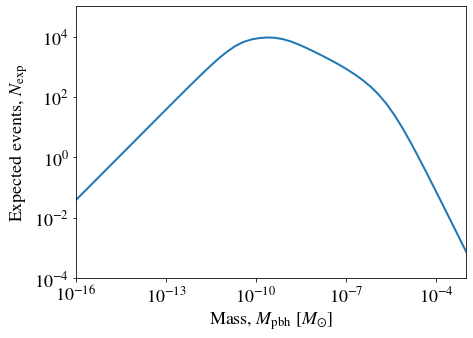

In [4]:
year = 365*24*60*60
E = 9.5e4*year

def sensitivity(t_hat):
    if (t_hat > 180) and (t_hat<10800):
        return 0.5
    else:
        return 0

def calc_Nexp(M, f_pbh = 1, t_vals = 100, xvals = 100):
    t_hats = np.logspace(2, 5, t_vals)
    dGdt = np.asarray([calc_dGdt(M, t_hat, xvals = 100) for t_hat in t_hats])
    sens = np.asarray([sensitivity(t_hat) for t_hat in t_hats])
    Nexp = f_pbh*E*np.trapz(sens*dGdt, t_hats)
    return Nexp

masses = np.logspace(-16, -3, 50)
Nexp = np.asarray([calc_Nexp(Mi) for Mi in masses])
plt.figure(figsize = (7,5))
plt.loglog(masses, Nexp, lw = 2)
plt.ylabel("Expected events, $N_{\mathrm{exp}}$");
plt.xlabel("Mass, $M_{\mathrm{pbh}}$ [$M_{\odot}$]");
plt.ylim(1e-4, 1e5)
plt.xlim(1e-16, 1e-3)

## 4) Constraints 

Recall that, in the absense of any events, we find the 95% confidence interval upper limit by finding $f_{pbh}$ such that $N_{\mathrm{exp}} = 3$. We can therefore simply calculate this interval as

\begin{equation}
    f_{\mathrm{pbh}}^{95\%} = \frac{3}{ N_{\mathrm{exp}}(f_{\mathrm{pbh}}=1) }
\end{equation}

**4.1** Hence calculate and plot the constaint from the HSC survey at the 95% confidence level $f_{\mathrm{pbh}}^{95\%}$

## 5) Wave effects

For very small masses, the Schwarzchild radius of the PBH is smaller than the typical wavelength of the observed light. This leads to suppression in the magnification which prevents us from being able to see these low mass objects. 

The Schwarzschild radius is given by
\begin{equation}
    r_{\mathrm{Sch}} = \frac{2 G M}{c^2}.
\end{equation}

HSC measures light at a wavelength of around 6000Å. We can calculate a lower-limit on the HSC sensitivity by finding the PBH mass with a Schwarzschild radius equal to this value.



(1e-16, 1)

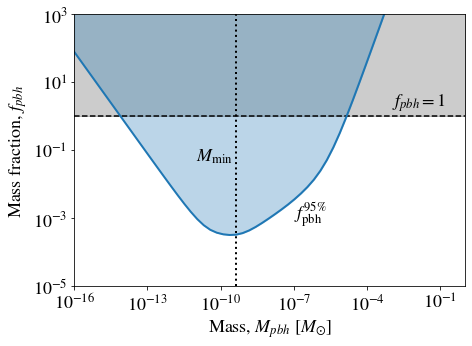

In [5]:
masses = np.logspace(-16, -3, 50)
Nexp = np.asarray([calc_Nexp(Mi) for Mi in masses])
f95 = 3/Nexp

plt.figure(figsize = (7,5))

plt.loglog([1e-16, 1], [1, 1], "k--")
plt.fill_between([1e-16, 1], [1, 1], [1e4, 1e4], color = "k", alpha = 0.2)
plt.loglog(masses, f95, lw = 2, label = "95%")
plt.fill_between(masses, f95, np.ones(len(f95))*1e4, 
                 color = "tab:blue", alpha = 0.3)
plt.ylabel("Mass fraction, $f_{pbh}$");
plt.xlabel("Mass, $M_{pbh}$ [$M_{\odot}$]");

plt.annotate("$f_{pbh}=1$", (1e-3, 2))
plt.annotate("$f_{\mathrm{pbh}}^{95\%}$", (1e-7, 1e-3))

# Schwarzschild radius
wavelength = 6000e-10/pc
Mlim = wavelength * c **2 / G
plt.loglog([Mlim, Mlim], [1e-5, 1e3],"k:", lw = 2)
plt.annotate("$M_{\mathrm{min}}$", (1e-11, 5e-2))

plt.ylim(1e-5, 1e3)
plt.xlim(1e-16, 1)